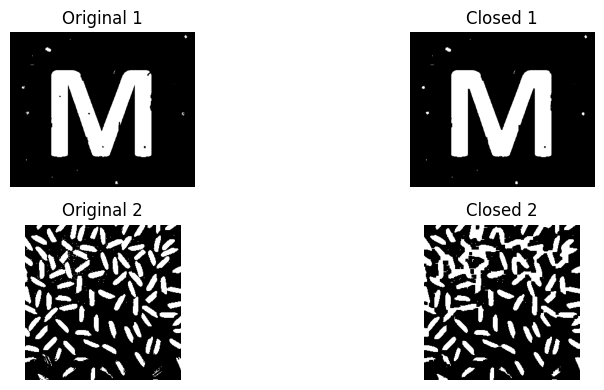

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

# Folder hasil
output_folder = r"C:\Users\user\tugas"
os.makedirs(output_folder, exist_ok=True)

# Path gambar
input_image1 = os.path.join(output_folder, "1.png")
input_image2 = os.path.join(output_folder, "2.png")

# Baca sebagai grayscale
img1 = cv2.imread(input_image1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(input_image2, cv2.IMREAD_GRAYSCALE)

# Validasi
if img1 is None or img2 is None:
    print("Gagal membaca salah satu gambar. Periksa path.")
else:
    # Konversi ke gambar biner
    _, binary1 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)
    _, binary2 = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY)

    # Kernel (structuring element)
    kernel = np.ones((5, 5), np.uint8)

    # Operasi closing
    closed1 = cv2.morphologyEx(binary1, cv2.MORPH_CLOSE, kernel)
    closed2 = cv2.morphologyEx(binary2, cv2.MORPH_CLOSE, kernel)

    # Simpan hasil
    cv2.imwrite(os.path.join(output_folder, "closed_1.png"), closed1)
    cv2.imwrite(os.path.join(output_folder, "closed_2.png"), closed2)

    # Tampilkan hasil di notebook
    plt.figure(figsize=(10, 4))

    plt.subplot(2, 2, 1)
    plt.title("Original 1")
    plt.imshow(binary1, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title("Closed 1")
    plt.imshow(closed1, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.title("Original 2")
    plt.imshow(binary2, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.title("Closed 2")
    plt.imshow(closed2, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
